In [ ]:
#import libraries
import matplotlib.pyplot as plt #graphing and data vizualization
import numpy as np #list to numpy array
import pandas as pd #data manipulation
import seaborn as sns #graphing
import os #manipulating the OS

import tensorflow as tf #imports Tensorflow

from tensorflow.keras.models import Sequential #Sequential Model from TensorFlow
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D #import differnet layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator #image generator for data prep

In [ ]:
#mounts google drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#data - https://drive.google.com/drive/folders/1zZVO59ErubkGUulHXSMiWtSCHkO1_-be?usp=sharing

PATH = "/content/drive/MyDrive/Colab Notebooks/Skin Cancer Detection/isic_archive/data"

In [ ]:
train = os.path.join(PATH, "train")
test = os.path.join(PATH, "test")

In [ ]:
#training dataset
train_B = os.path.join(train, "benign")
train_M = os.path.join(train, "malignant")

#testing dataset
test_B = os.path.join(test, "benign")
test_M = os.path.join(test, "malignant")

In [ ]:
total_train = (len(os.listdir(train_B))+len(os.listdir(train_M)))
total_test = (len(os.listdir(test_B))+len(os.listdir(test_M)))

print(f'total training beningn images: {len(os.listdir(train_B))}')
print('total training malignant images:', len(os.listdir(train_M)))

print('total test benign images:', len(os.listdir(test_B)))
print('total test malignant images:', len(os.listdir(test_M)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_test)

total training beningn images: 1440
total training malignant images: 1197
total test benign images: 360
total test malignant images: 300
--
Total training images: 2637
Total validation images: 660


In [ ]:
#pre-defining important variables
batch_size = 60
epochs = 5
IMG_HEIGHT = 200
IMG_WIDTH = 200

In [ ]:
#data preparation for the model

train_image_generator = ImageDataGenerator(rescale=1/255) # Generator for our training data
test_image_generator = ImageDataGenerator(rescale=1/255) # Generator for our validation data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           classes = ["benign", "malignant"],
                                                           directory=train,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2637 images belonging to 2 classes.


In [ ]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size, 
                                                         classes = ["benign", "malignant"],
                                                         directory=test,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode='binary')

Found 660 images belonging to 2 classes.


In [ ]:
#vizualizing the training images

sample_training_images, _ = next(train_data_gen)

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

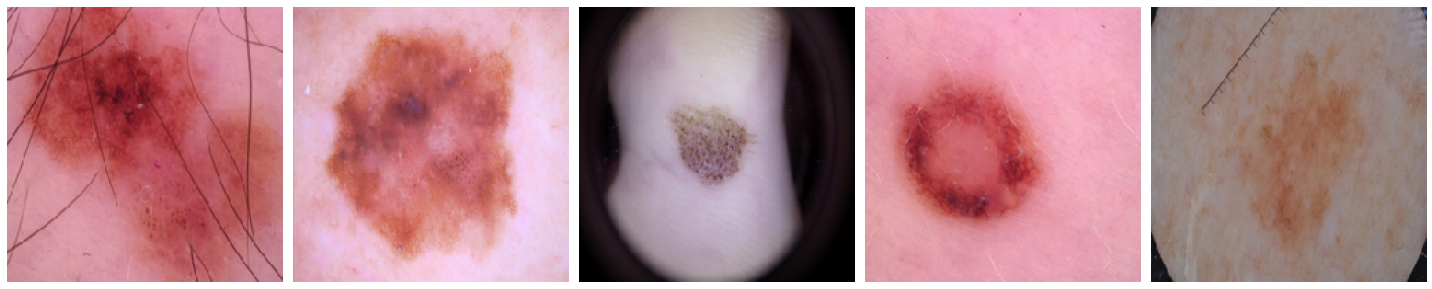

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
#building the model

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH , 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
#compile

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0

In [ ]:
#training the model

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train  // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_test // batch_size
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
43/43 [==============================] - 11s 262ms/step - loss: 0.3192 - accuracy: 0.8453 - val_loss: 0.3520 - val_accuracy: 0.8182


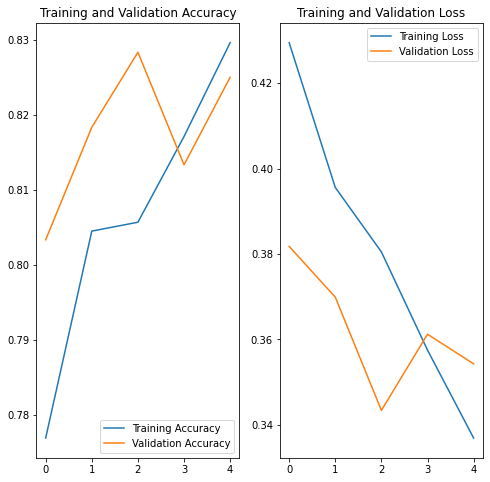

In [ ]:
#vizualizing the results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#print("")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()